# Data Science: análise de séries temporais

## 01. Tendência das vendas

In [1]:
import pandas as pd

In [4]:
alucar = pd.read_csv('data/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [6]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<Axes: xlabel='mes', ylabel='vendas'>

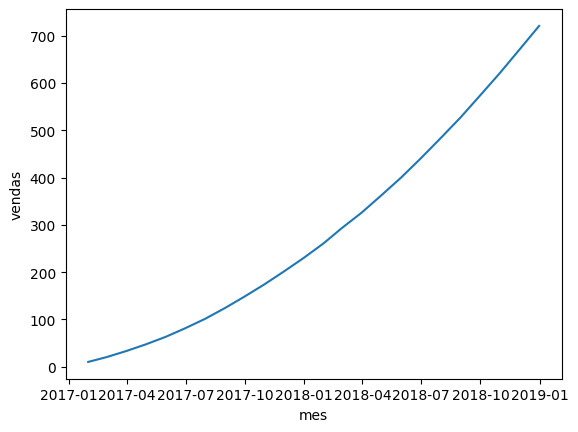

In [11]:
sns.lineplot(x='mes', y='vendas', data=alucar)

[Urban Institute Data Visualization style guide](http://urbaninstitute.github.io/graphics-styleguide/)

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

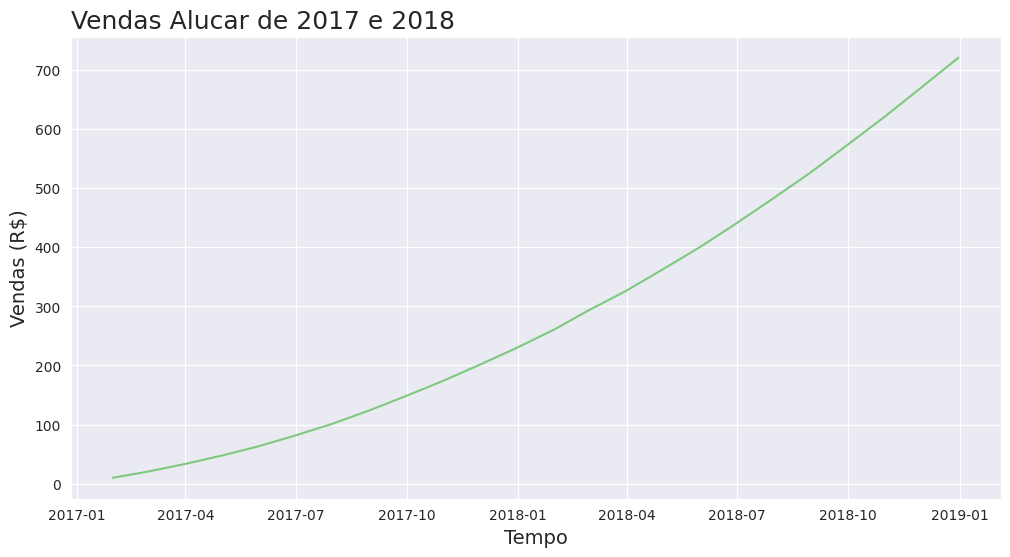

In [19]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

## 02. Decomposição e autocorrelação

In [21]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [26]:
def plotar(titulo: str, xlabel: str, ylabel: str, x: str, y: str, dataset: pd.DataFrame) -> None:
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

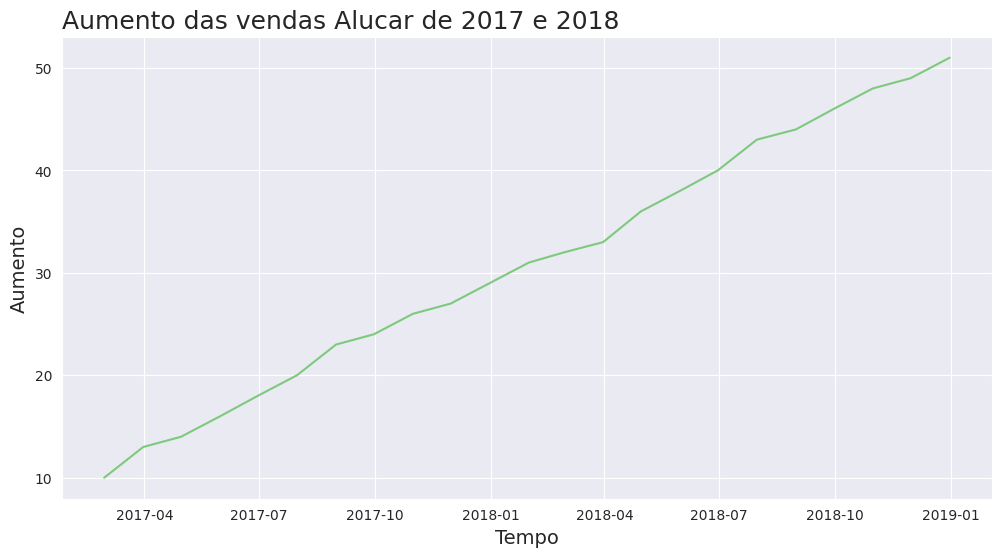

In [28]:
plotar(titulo='Aumento das vendas Alucar de 2017 e 2018', 
       x='mes',
       xlabel='Tempo',
       y='aumento',
       ylabel='Aumento',
       dataset=alucar)

In [29]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


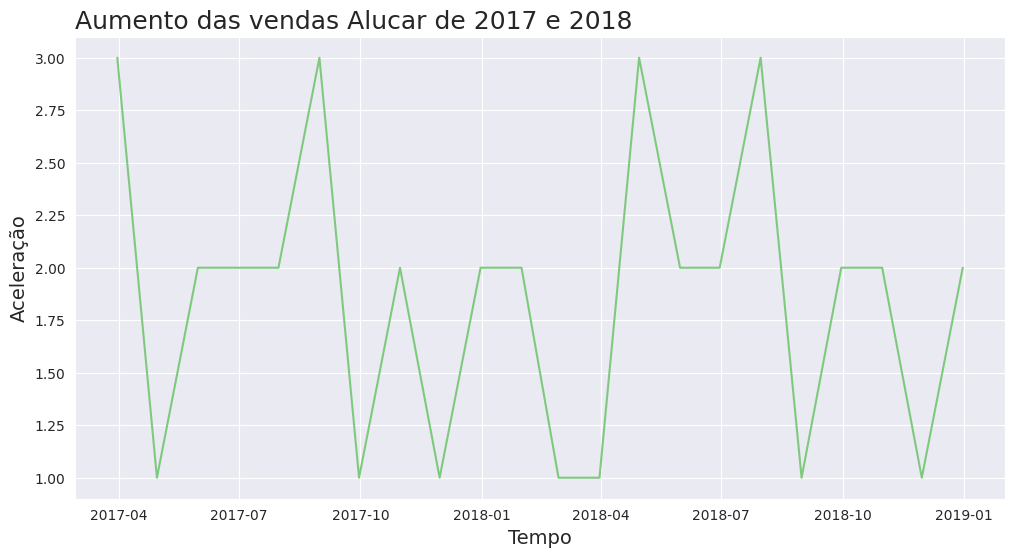

In [30]:
plotar(titulo='Aumento das vendas Alucar de 2017 e 2018', 
       x='mes',
       xlabel='Tempo',
       y='aceleracao',
       ylabel='Aceleração',
       dataset=alucar)

In [34]:
def plot_comparacao(x: str, y1: str, y2: str, y3: str, titulo: str, dataset: pd.DataFrame) -> None:
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

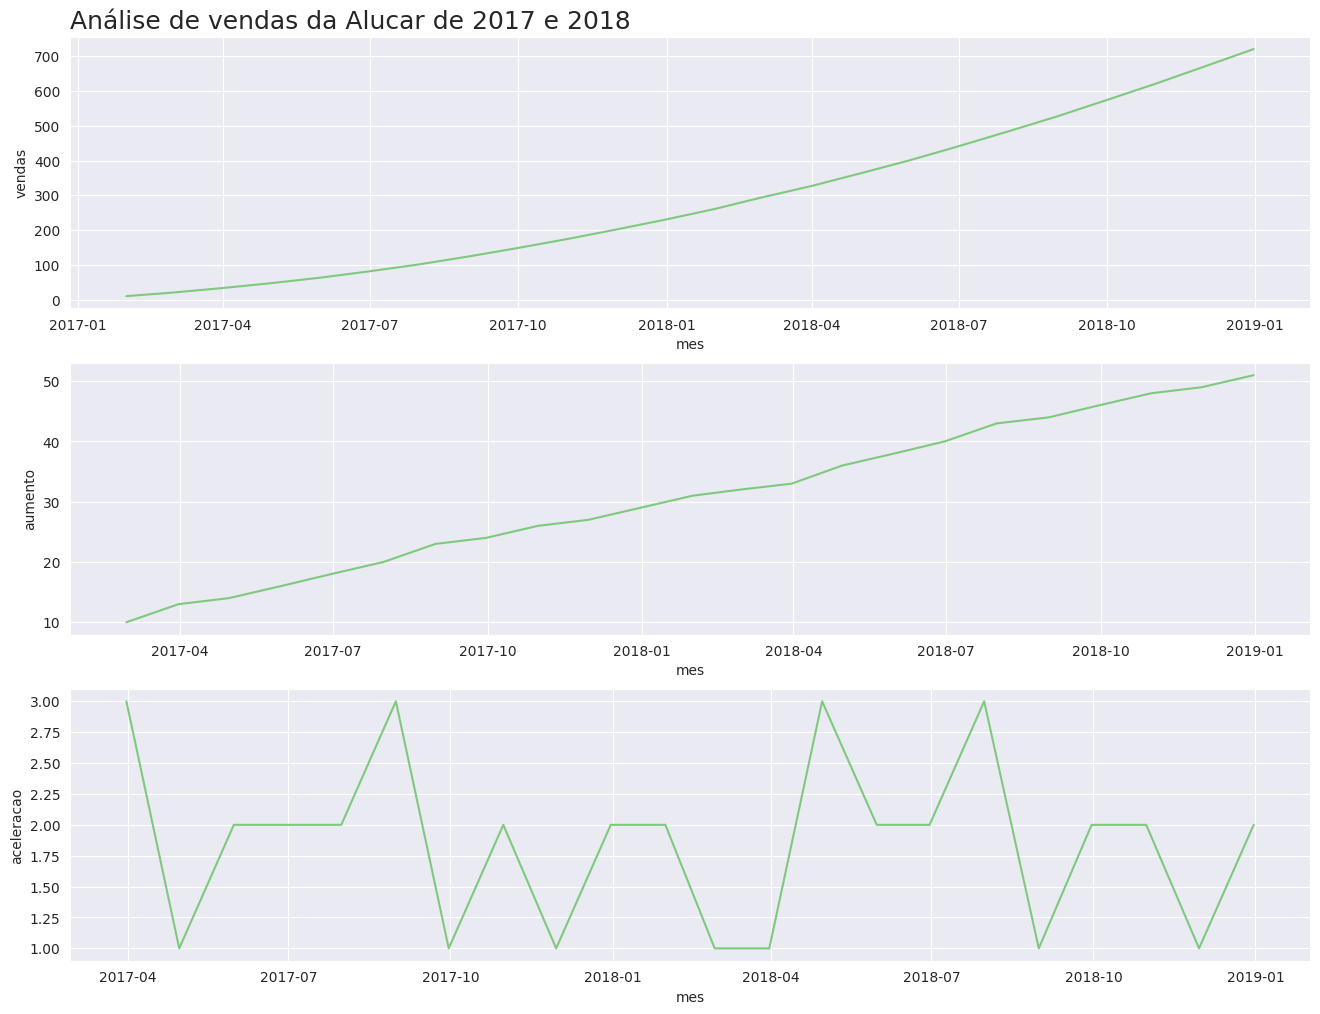

In [35]:
plot_comparacao(x='mes',
                y1='vendas',
                y2='aumento',
                y3='aceleracao',
                titulo='Análise de vendas da Alucar de 2017 e 2018',
                dataset=alucar)

In [36]:
from pandas.plotting import autocorrelation_plot

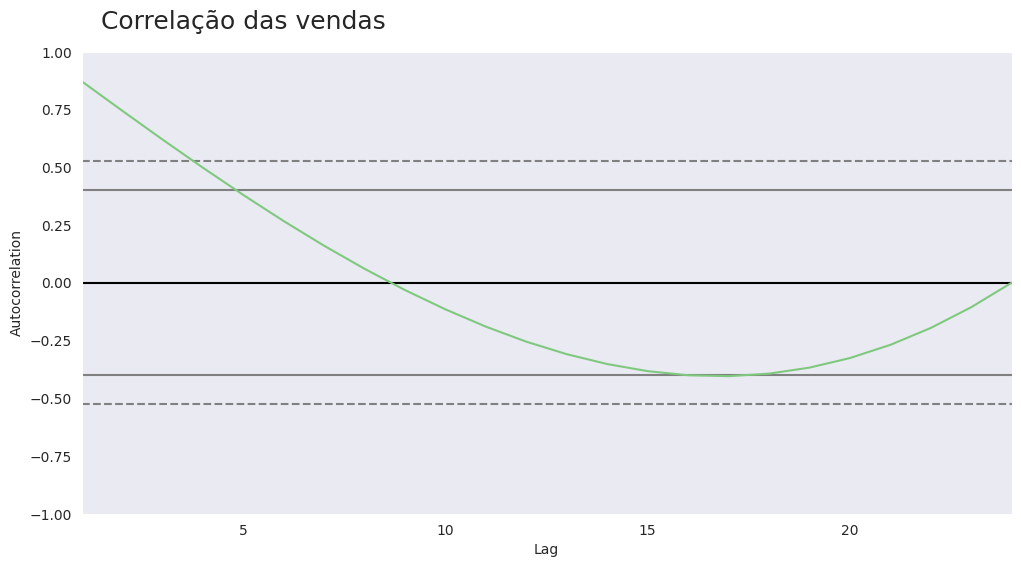

In [42]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

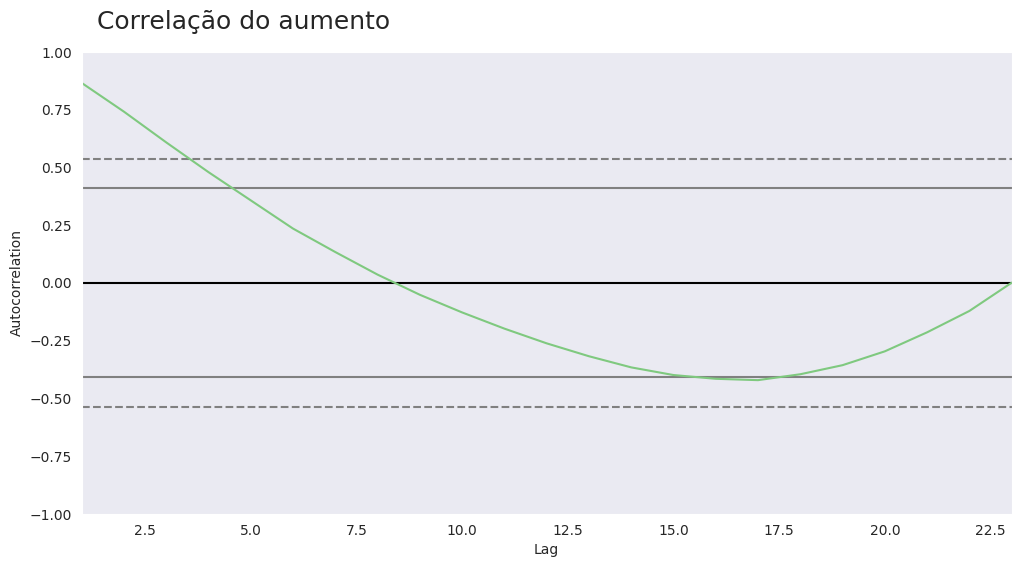

In [44]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

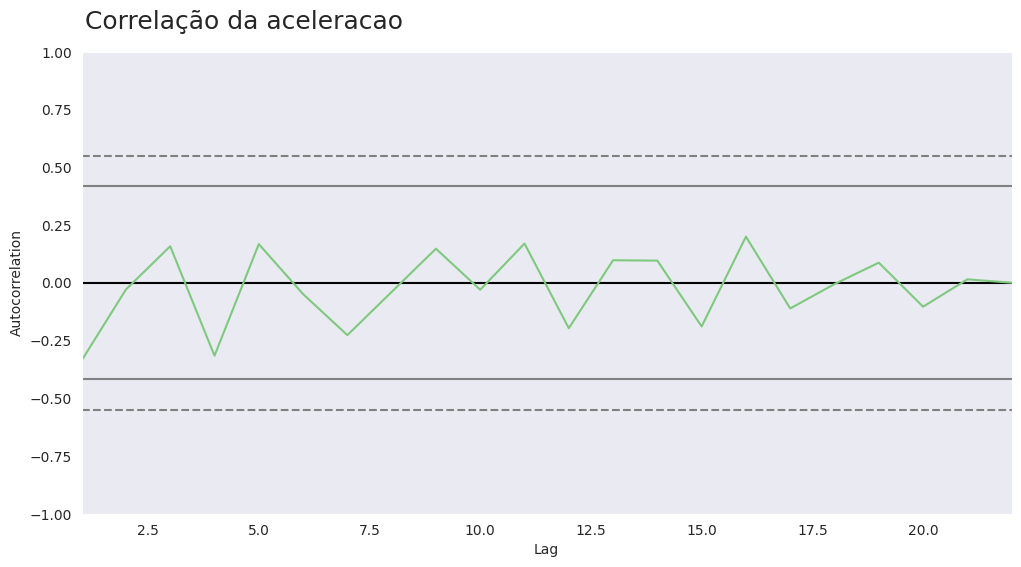

In [45]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

| Autocorrelação | Interpretação |
|----------------|---------------|
| 1              | correlação perfeita positiva |
| 0,7 a 0,9      | correlação forte |
| 0,4 a 0,7      | correlação moderada |
| 0,2 a 0,4      | correlação fraca |
| 0              | correlação nula |
| < 0            | correlação negativa |
| -1             | correlação perfeita negativa |

[Autocorrelação](https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o)

EM [estatística](https://pt.wikipedia.org/wiki/Estat%C3%ADstica), **autocorrelação** é uma medida que informa o quanto o valor de uma [realização](https://pt.wikipedia.org/wiki/Realiza%C3%A7%C3%A3o) de uma [variável aleatória](https://pt.wikipedia.org/wiki/Vari%C3%A1vel_aleat%C3%B3ria) é capaz de influenciar seus vizinhos. Por exemplo, o quanto a existência de um valor mais alto condiciona valores também altos de seus vizinhos.

Segundo a definição da estatística, o valor da autocorrelação está entre 1([correlação](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o) perfeita) e -1, o que significa [anti-correlação](https://pt.wikipedia.org/w/index.php?title=Anti-correla%C3%A7%C3%A3o&action=edit&redlink=1) perfeita. O valor 0 significa total ausência de correlação.

A autocorrelação de uma dada variável se define pela distância, ou [atraso](https://pt.wikipedia.org/w/index.php?title=Atraso&action=edit&redlink=1) com que se deseja medi-la. Quando essa distância é zero, tem-se o valor máximo 1, pois trata-se da variável correlacionada com ela mesma. Outros valores devem ser calculados caso a caso.

Supondo-se uma variável aleatória $X_{t}$ [discreta](https://pt.wikipedia.org/wiki/Discreta) [estacionária](https://pt.wikipedia.org/w/index.php?title=Estacion%C3%A1ria&action=edit&redlink=1), dependente do tempo, com média $\mu$, sua autocorrelação $p(k)$ é definida como:

$$p(k) = \frac{Cov(X_{t}, X_{t+k})}{Var(X_{t})} = \frac{\gamma(k)}{\gamma(0)} = \frac{E[(X_{t}-\mu)(X_{t+k}-\mu)]}{\sigma²}$$

onde $E[]$ é o valor médio, [esperança](https://pt.wikipedia.org/wiki/Esperan%C3%A7a) matemática ou [expectativa](https://pt.wikipedia.org/w/index.php?title=Expectativa&action=edit&redlink=1) da expressão, $k$ é o deslocamento no tempo e o $\sigma²$ é a [variância](https://pt.wikipedia.org/wiki/Vari%C3%A2ncia) da variável $X_{t}$.

Podemos utilizar a denotação de $\gamma$ que indica a autovariância entre as variáveis - pois, neste caso, estamos descrevendo as [covariâncias](https://pt.wikipedia.org/wiki/Covari%C3%A2ncia) entre duas variáveis do processo no instante $t$ e no instante $_{t+k}$. Observa-se no denominador que o $\gamma(0)$ representa a autocorrelação ou covariância da variável com ela mesma - assim, por definição, ela é igual à sua [variância](https://pt.wikipedia.org/wiki/Vari%C3%A2ncia) $Var(X_{t})=\sigma²$.

Caso se retire da fórmula acima a [variância](https://pt.wikipedia.org/wiki/Vari%C3%A2ncia) $\sigma²$ tem-se a chamada [autocovariância](https://pt.wikipedia.org/w/index.php?title=Autocovari%C3%A2ncia&action=edit&redlink=1), que descreve o quanto a variável $X_{t}$ varia em conjunto com sua instância com atraso $k$.

O conceito de autocorrelação tem aplicação a muitas áreas, que vão da [análise dos sinais](https://pt.wikipedia.org/w/index.php?title=An%C3%A1lise_dos_sinais&action=edit&redlink=1) à [óptica](https://pt.wikipedia.org/wiki/%C3%93ptica), passando pela [economia](https://pt.wikipedia.org/wiki/Economia) e pela [geofísica](https://pt.wikipedia.org/wiki/Geof%C3%ADsica).

## 03. Importância da decomposição e sazonalidade

In [47]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [48]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [49]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [50]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [52]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


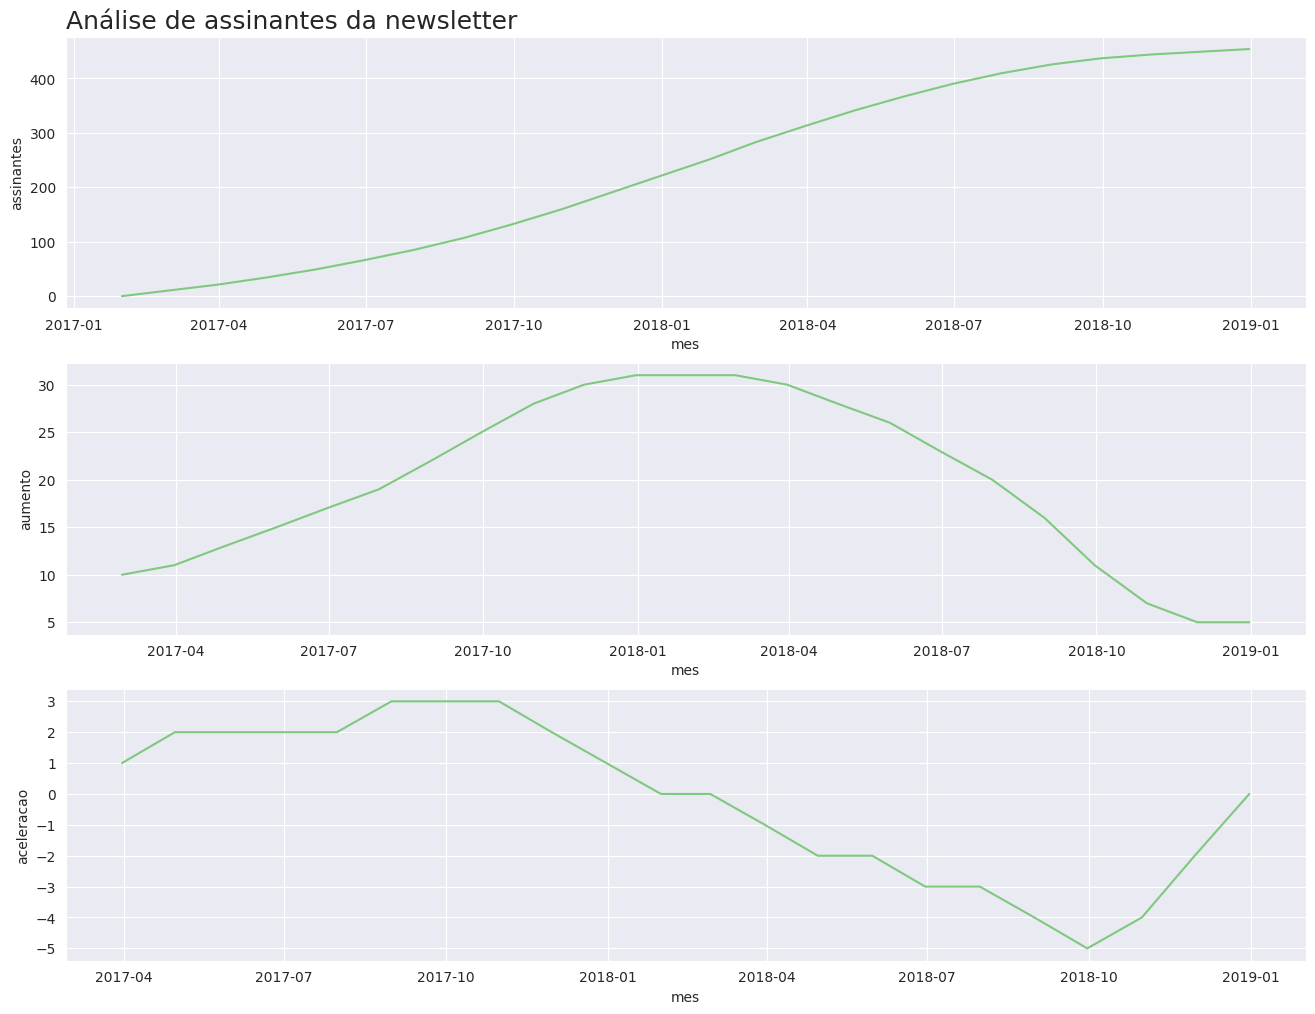

In [53]:
plot_comparacao(x='mes',
                y1='assinantes',
                y2='aumento',
                y3='aceleracao',
                titulo='Análise de assinantes da newsletter',
                dataset=assinantes)